In [31]:
# Import all necessary packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
# Read input train data

train = pd.read_csv("input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Read input test data

test = pd.read_csv("input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Split train data and change types

X_train = (train.iloc[:, 1:].values).astype('float32')
y_train = train.iloc[:, 0].values.astype('int32')
X_test = test.values.astype('float32')

In [35]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [36]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

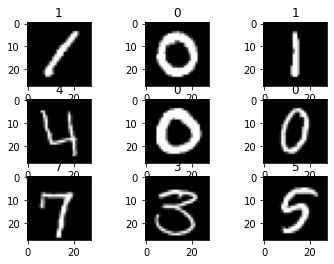

In [37]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i + 1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [38]:
# Reshape train set

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train.shape

(42000, 28, 28, 1)

In [39]:
# Reshape test set

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(28000, 28, 28, 1)

In [40]:
# Standartize all values. It will be used as Lambda layer.

mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px) / std_px

In [41]:
# One hot encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [42]:
# Fix random seed for reproducibility

seed = 42
np.random.seed(seed)

In [43]:
from keras.models import  Sequential
from keras.layers.core import  Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

In [44]:
model = Sequential()
model.add(Lambda(standardize, input_shape = (28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))
print("Input shape ", model.input_shape)
print("Output shape ", model.output_shape)

Input shape  (None, 28, 28, 1)
Output shape  (None, 10)


In [45]:
from keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [46]:
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [47]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.10, random_state = seed)
batches = gen.flow(X_train, y_train, batch_size = 64)
val_batches = gen.flow(X_val, y_val, batch_size = 64)

In [53]:
history = model.fit_generator(generator = batches,
                              steps_per_epoch = np.floor(batches.n / 64),
                              epochs = 20,
                              validation_data = val_batches,
                              validation_steps = val_batches.n)

Epoch 1/100
590/590 [==============================] - 1s 1ms/step - loss: 0.2522 - accuracy: 0.9298 - val_loss: 0.3012 - val_accuracy: 0.9138
Epoch 2/100
590/590 [==============================] - 1s 993us/step - loss: 0.2501 - accuracy: 0.9322
Epoch 3/100
590/590 [==============================] - 1s 985us/step - loss: 0.2498 - accuracy: 0.9311
Epoch 4/100
590/590 [==============================] - 1s 979us/step - loss: 0.2469 - accuracy: 0.9316
Epoch 5/100
590/590 [==============================] - 1s 987us/step - loss: 0.2472 - accuracy: 0.9322
Epoch 6/100
590/590 [==============================] - 1s 989us/step - loss: 0.2452 - accuracy: 0.9336
Epoch 7/100
590/590 [==============================] - 1s 976us/step - loss: 0.2435 - accuracy: 0.9333
Epoch 8/100
590/590 [==============================] - 1s 1ms/step - loss: 0.2423 - accuracy: 0.9326
Epoch 9/100
590/590 [==============================] - 1s 984us/step - loss: 0.2422 - accuracy: 0.9338
Epoch 10/100
590/590 [=============

590/590 [==============================] - 1s 976us/step - loss: 0.2184 - accuracy: 0.9413
Epoch 77/100
590/590 [==============================] - 1s 962us/step - loss: 0.2179 - accuracy: 0.9408
Epoch 78/100
590/590 [==============================] - 1s 973us/step - loss: 0.2167 - accuracy: 0.9411
Epoch 79/100
590/590 [==============================] - 1s 976us/step - loss: 0.2172 - accuracy: 0.9406
Epoch 80/100
590/590 [==============================] - 1s 1ms/step - loss: 0.2179 - accuracy: 0.9407
Epoch 81/100
590/590 [==============================] - 1s 976us/step - loss: 0.2183 - accuracy: 0.9405
Epoch 82/100
590/590 [==============================] - 1s 974us/step - loss: 0.2172 - accuracy: 0.9415
Epoch 83/100
590/590 [==============================] - 1s 969us/step - loss: 0.2173 - accuracy: 0.9413
Epoch 84/100
590/590 [==============================] - 1s 981us/step - loss: 0.2174 - accuracy: 0.9410
Epoch 85/100
590/590 [==============================] - 1s 972us/step - loss: 0

In [54]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

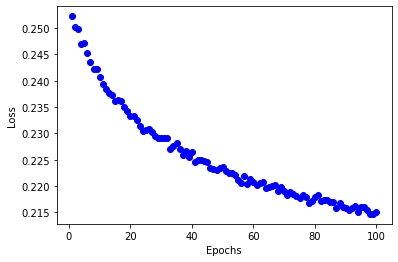

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()